In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('tested.csv')

In [3]:
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [5]:
data = data.dropna(subset=['Embarked'])

In [6]:
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])

In [7]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [8]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [14]:
print(confusion_matrix(y_test, y_pred))

[[50  0]
 [ 0 34]]


In [15]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Survival Count by Pclass')

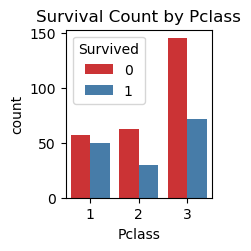

In [16]:
plt.subplot(2, 3, 1)
sns.countplot(x='Pclass', data=data, hue='Survived', palette='Set1')
plt.title('Survival Count by Pclass')

Text(0.5, 1.0, 'Survival Count by Sex')

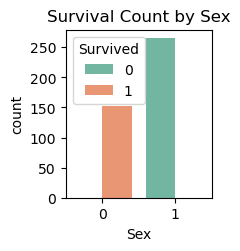

In [17]:
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', data=data, hue='Survived', palette='Set2')
plt.title('Survival Count by Sex')

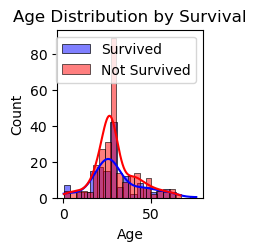

In [18]:
plt.subplot(2, 3, 3)
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, bins=20, color='blue', label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, bins=20, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.legend()

Text(0.5, 1.0, 'Survival Count by Embarked')

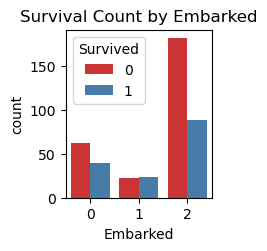

In [19]:
plt.subplot(2, 3, 4)
sns.countplot(x='Embarked', data=data, hue='Survived', palette='Set1')
plt.title('Survival Count by Embarked')

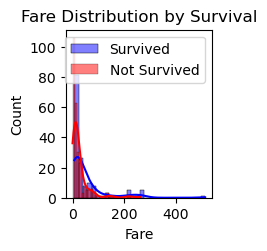

In [20]:
plt.subplot(2, 3, 5)
sns.histplot(data[data['Survived'] == 1]['Fare'], kde=True, bins=30, color='blue', label='Survived')
sns.histplot(data[data['Survived'] == 0]['Fare'], kde=True, bins=30, color='red', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>